<a href="https://colab.research.google.com/github/Bharath-Joe/CSC487/blob/main/MLP_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics

In [ ]:
import torch

class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

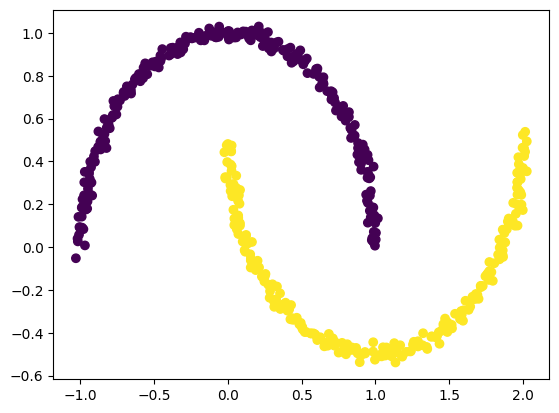

In [ ]:
# CREATE RANDOM DATA POINTS
import numpy
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

X,y=make_moons(n_samples=500,noise=0.02)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = [torch.FloatTensor(data) for data in train_test_split(X, y, test_size=0.33, random_state=42)]

In [ ]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss() #torch.nn.MSELoss() #torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
y_pred = model(X_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.7319258451461792


In [ ]:
#model.train()
epoch = 500
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    if epoch % 50 == 0:
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.7620874047279358
Epoch 50: train loss: 0.6778379678726196
Epoch 100: train loss: 0.616983950138092
Epoch 150: train loss: 0.5688148140907288
Epoch 200: train loss: 0.5288422107696533
Epoch 250: train loss: 0.4947286546230316
Epoch 300: train loss: 0.4652545154094696
Epoch 350: train loss: 0.4396052956581116
Epoch 400: train loss: 0.41729047894477844
Epoch 450: train loss: 0.3979547321796417


In [ ]:
y_pred = model(X_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss after training' , before_train.item())

Test loss after training 0.3857593536376953


In [ ]:
from torchmetrics.classification import BinaryROC
metric = BinaryROC(thresholds=None)
fpr,tpr,thresholds = metric(((y_pred+1)/2).squeeze(), ((y_test+1)/2).int())

In [ ]:
import altair as alt
import numpy as np
import pandas as pd

source = pd.DataFrame({
  'TPR': tpr.numpy(),
  'FPR': fpr.numpy()
})

alt.Chart(source).mark_line().encode(
    x='FPR',
    y='TPR'
)

alt.Chart(...)